In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
#from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline
import math
data = pd.read_csv(f'drive/MyDrive/Datasets/Survey Form.csv')
data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Timestamp,Name,Gender,Age,Your highest educational qualification,Your Marital status,Do you have kids,Did you face any problem while WFH because of kids,Compare to pre pandemic do you now get more time to spend with your family,Do you feel your bond has become stronger with your partner during WFH,...,How do you feel about your mental well-being during WFH,How would you rate your work-life balance pre pandemic?,How would you rate your current work-life balance?,The level of stress due to work pre pandemic,The level of stress due to work during WFH,Have you been stressed out about deadlines during the WFH scenario.,Select the anxiety symptoms you have,Select the Psychological symptoms you have:,Select the physical symptoms you have:,Have you ever taken treatment for stress-related issues
0,2022/02/18 11:30:26 AM GMT+5:30,Rahul Patnaik,Male,24,Graduation,Single,No,No,Yes,Yes,...,2,5,2,2,4,Yes,Feeling nervous;Restless or tense,Anxiety;Irritability,Fatigue;Heart palpitations;Gastrointestinal up...,No
1,2022/02/18 12:53:26 PM GMT+5:30,pranav kumar,Male,25,Graduation,Single,No,No,Yes,I'm single,...,3,3,3,3,3,No,Feeling nervous;Restless or tense;Sweating;Bre...,I don't have any of these symptoms,I don't have any of these symptoms,No
2,2022/02/18 12:56:12 PM GMT+5:30,Alagar,Male,32,Masters/Post Graduation,Married,Yes,No,No,Yes,...,3,4,2,3,5,Yes,No,I don't have any of these symptoms,I don't have any of these symptoms,No
3,2022/02/18 12:56:54 PM GMT+5:30,Neha,Female,24,Masters/Post Graduation,Single,No,No,Yes,Yes,...,3,3,3,3,4,Yes,Feeling nervous;Sweating,I don't have any of these symptoms,Headaches,No
4,2022/02/18 1:09:19 PM GMT+5:30,priyanka kumari,Female,27,Graduation,Married,No,No,Yes,Yes,...,5,3,4,5,2,No,na,I don't have any of these symptoms,I don't have any of these symptoms,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 45 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                     --------------  ----- 
 0   Timestamp                                                                                                                  100 non-null    object
 1   Name                                                                                                                       95 non-null     object
 2   Gender                                                                                                                     100 non-null    object
 3   Age                                                                                                                        100 non-null 

<Axes: xlabel='Have you ever taken treatment for stress-related issues', ylabel='count'>

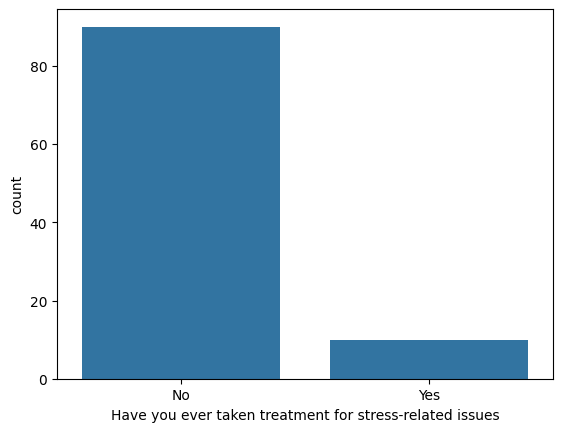

In [ ]:
sns.countplot(x="Have you ever taken treatment for stress-related issues", data=data)

<Axes: xlabel='Have you ever taken treatment for stress-related issues', ylabel='count'>

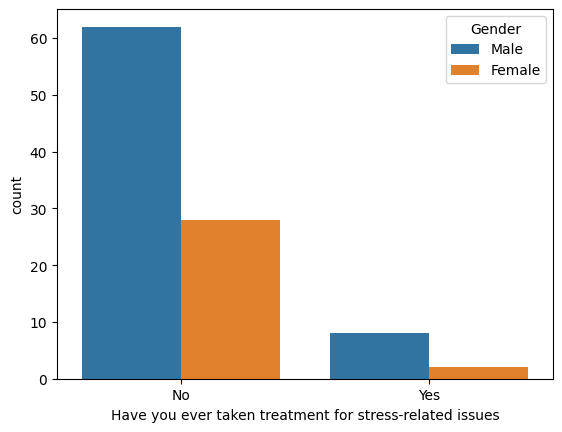

In [ ]:
sns.countplot(x="Have you ever taken treatment for stress-related issues",hue="Gender", data=data)

<Axes: xlabel='Have you ever taken treatment for stress-related issues', ylabel='count'>

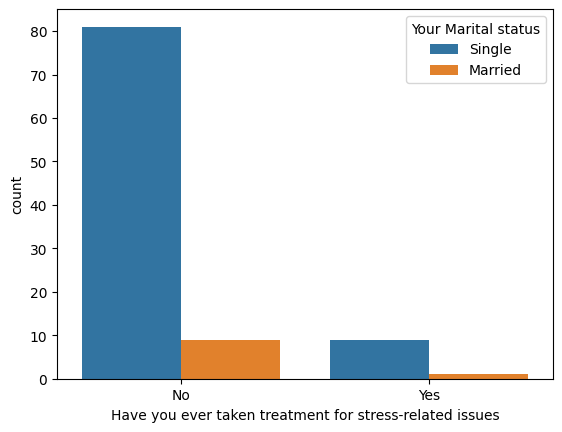

In [ ]:
sns.countplot(x="Have you ever taken treatment for stress-related issues",hue="Your Marital status", data=data)

<Axes: xlabel='Are you facing any conflict/fight with family member due to work load during WFH', ylabel='count'>

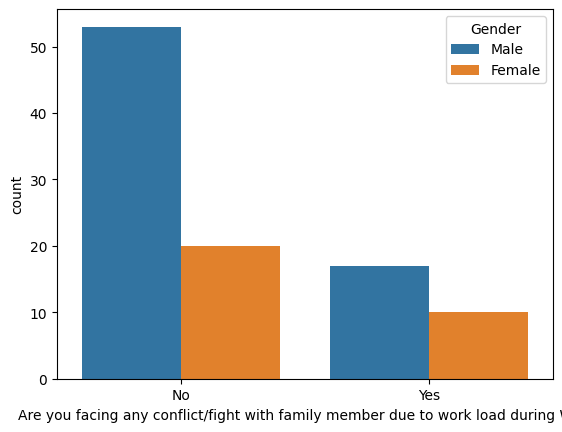

In [ ]:
sns.countplot(x="Are you facing any conflict/fight with family member due to work load during WFH",hue="Gender", data=data)

<Axes: xlabel='Have you ever taken treatment for stress-related issues', ylabel='count'>

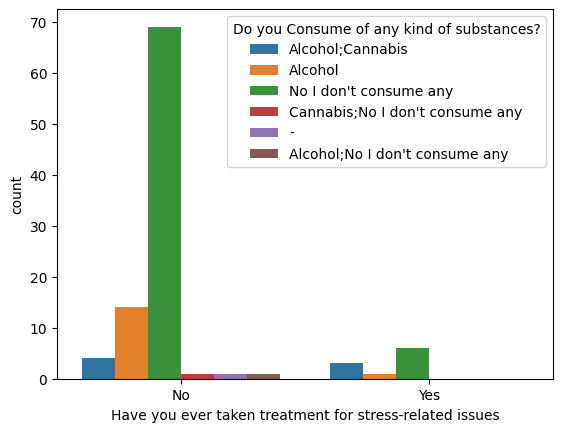

In [ ]:
sns.countplot(x="Have you ever taken treatment for stress-related issues",hue="Do you Consume of any kind of substances?", data=data)

<Axes: xlabel='Have you ever taken treatment for stress-related issues', ylabel='count'>

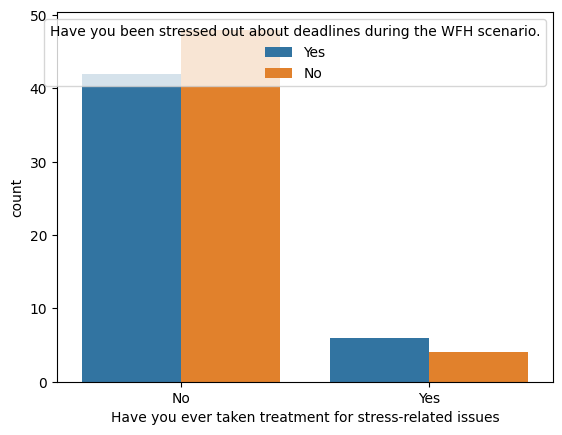

In [ ]:
sns.countplot(x="Have you ever taken treatment for stress-related issues",hue="Have you been stressed out about deadlines during the WFH scenario.", data=data)

<Axes: xlabel='Have you ever taken treatment for stress-related issues', ylabel='count'>

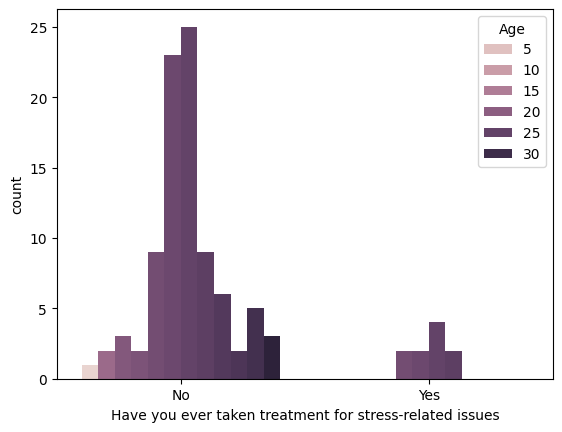

In [ ]:
sns.countplot(x="Have you ever taken treatment for stress-related issues",hue="Age", data=data)

<Axes: xlabel='Have you ever taken treatment for stress-related issues', ylabel='count'>

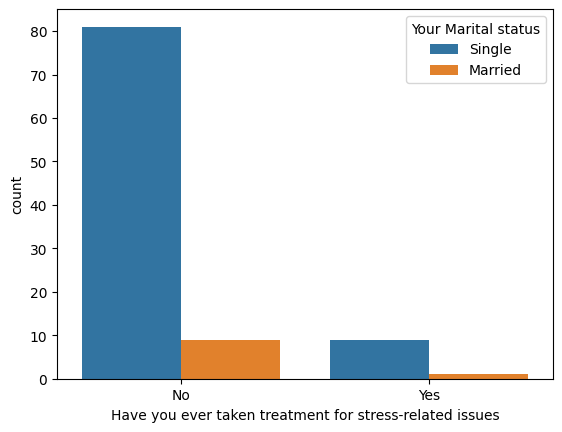

In [ ]:
sns.countplot(x="Have you ever taken treatment for stress-related issues",hue="Your Marital status", data=data)

<Axes: ylabel='Frequency'>

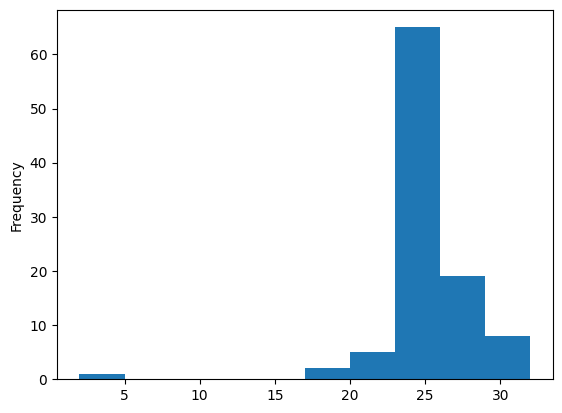

In [ ]:
data["Age"].plot.hist()

<Axes: xlabel='Duration of sleep', ylabel='count'>

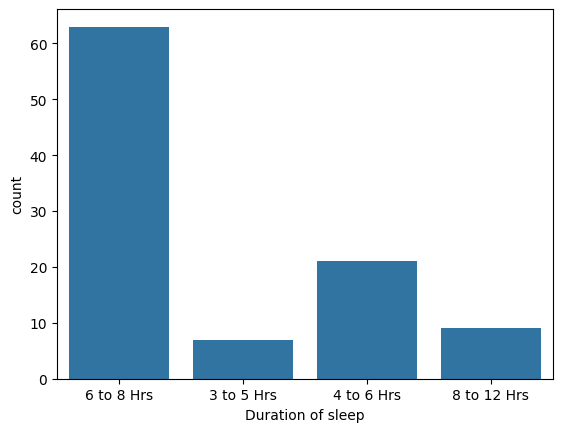

In [ ]:
sns.countplot(x="Duration of sleep", data=data)

<Axes: xlabel='Duration of sleep', ylabel='count'>

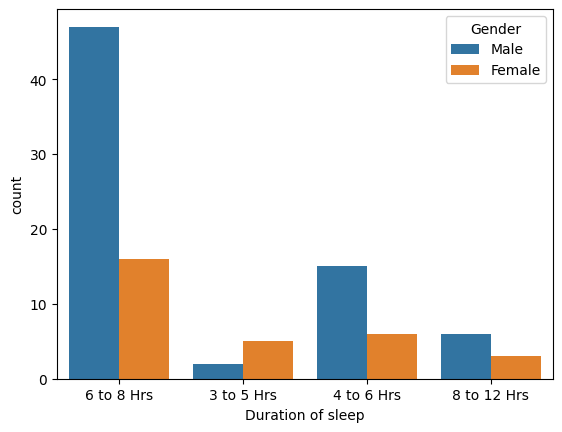

In [ ]:
sns.countplot(x="Duration of sleep",hue="Gender", data=data)

<Axes: xlabel='The quality time spent with family', ylabel='count'>

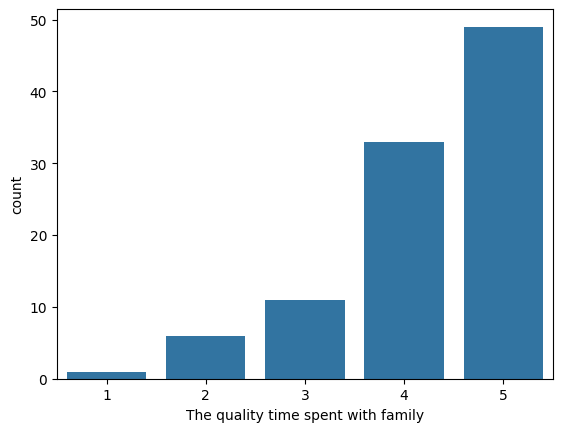

In [ ]:
sns.countplot(x="The quality time spent with family", data=data)

<Axes: xlabel='The quality time spent with family', ylabel='count'>

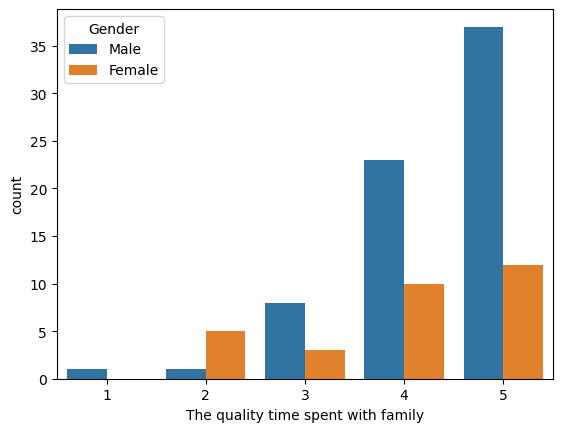

In [ ]:
sns.countplot(x="The quality time spent with family",hue="Gender", data=data)

<Axes: xlabel='The quality time spent with family', ylabel='count'>

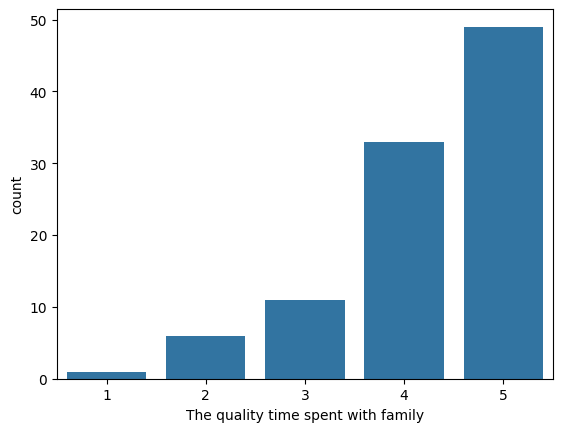

In [ ]:
sns.countplot(x="The quality time spent with family", data=data)

<Axes: xlabel='Are you willing to WFH permanently?', ylabel='count'>

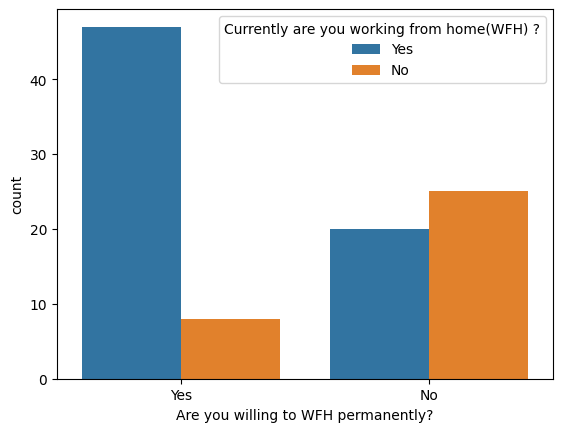

In [ ]:
sns.countplot(x="Are you willing to WFH permanently?",hue="Currently are you working from home(WFH) ?", data=data)

<Axes: xlabel='Currently are you working from home(WFH) ?', ylabel='count'>

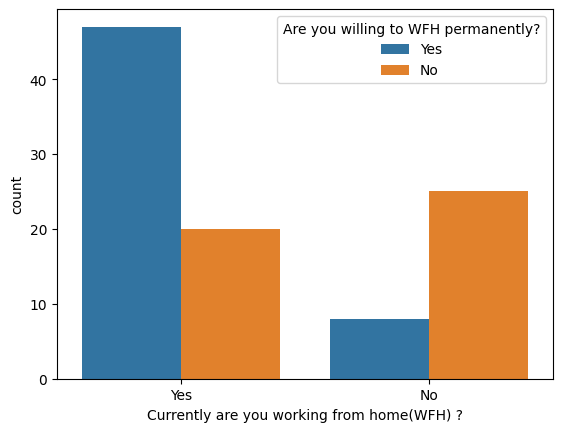

In [ ]:
sns.countplot(x="Currently are you working from home(WFH) ?",hue="Are you willing to WFH permanently?", data=data)

<Axes: xlabel='How was your bond with the family members before pandemic', ylabel='count'>

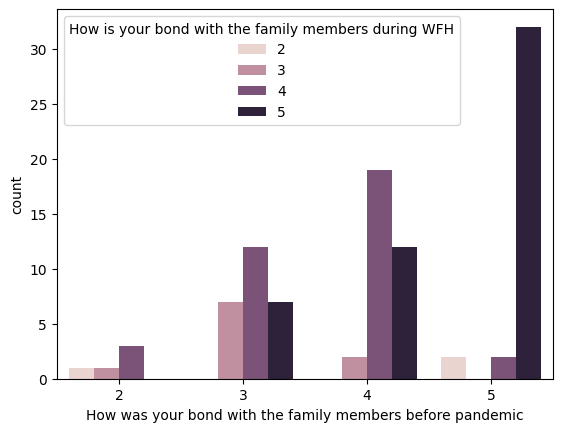

In [ ]:
sns.countplot(x="How was your bond with the family members before pandemic",hue="How is your bond with the family members during WFH", data=data)

<Axes: xlabel='Have you ever taken treatment for stress-related issues', ylabel='count'>

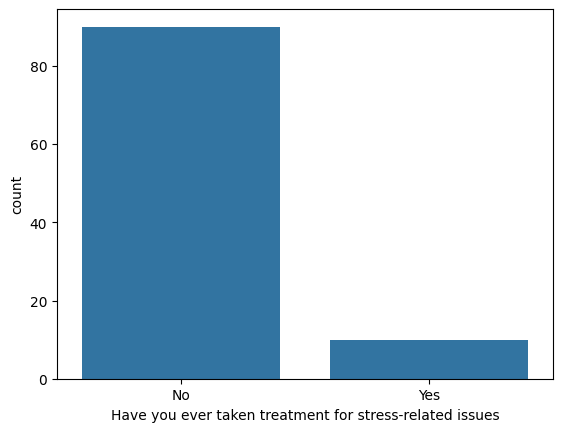

In [ ]:
sns.countplot(x="Have you ever taken treatment for stress-related issues", data=data)

In [ ]:
data.isnull()

,Timestamp,Name,Gender,Age,Your highest educational qualification,Your Marital status,Do you have kids,Did you face any problem while WFH because of kids,Compare to pre pandemic do you now get more time to spend with your family,Do you feel your bond has become stronger with your partner during WFH,...,How do you feel about your mental well-being during WFH,How would you rate your work-life balance pre pandemic?,How would you rate your current work-life balance?,The level of stress due to work pre pandemic,The level of stress due to work during WFH,Have you been stressed out about deadlines during the WFH scenario.,Select the anxiety symptoms you have,Select the Psychological symptoms you have:,Select the physical symptoms you have:,Have you ever taken treatment for stress-related issues
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

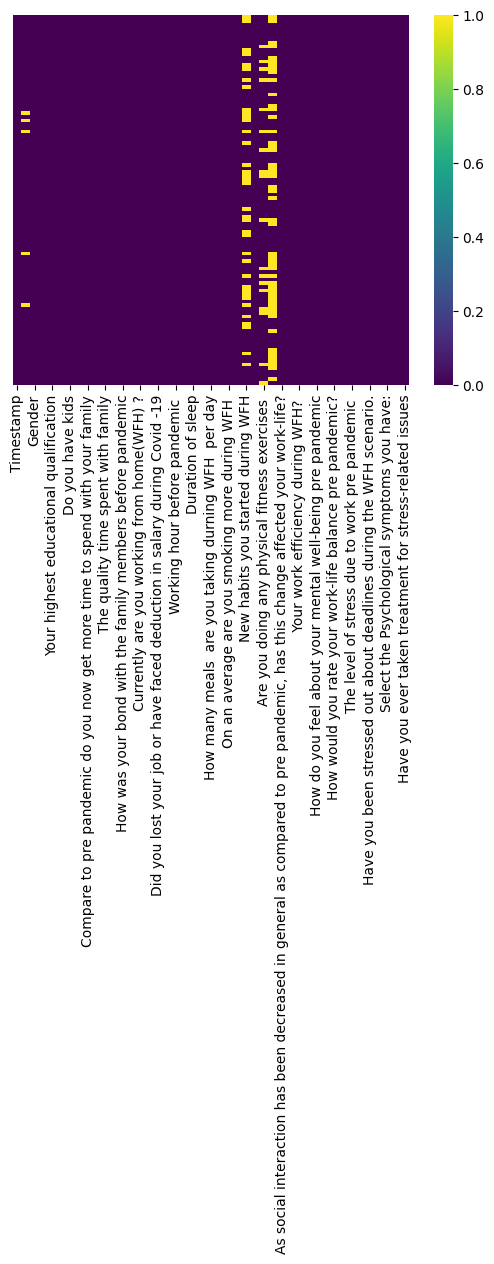

In [ ]:
sns.heatmap(data.isnull(),yticklabels = False,cmap = 'viridis')

In [ ]:
data.isnull().sum()

Timestamp                                                                                                                     0
Name                                                                                                                          5
Gender                                                                                                                        0
Age                                                                                                                           0
Your highest educational qualification                                                                                        0
Your Marital status                                                                                                           0
Do you have kids                                                                                                              0
Did you face any problem while WFH because of kids                                                      

<Axes: xlabel='New habits you started during WFH', ylabel='count'>

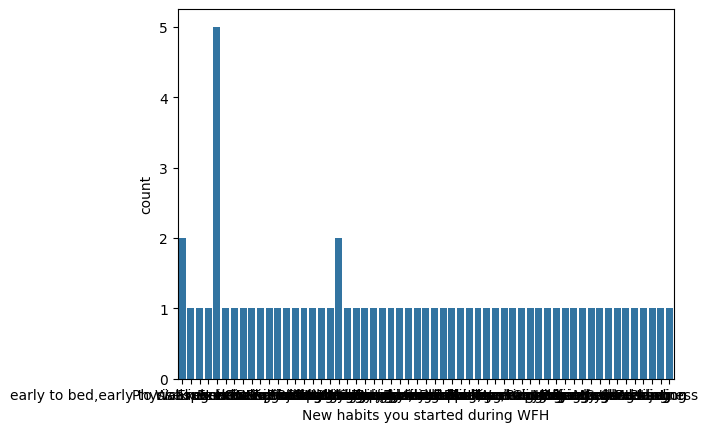

In [ ]:
sns.countplot(x="New habits you started during WFH", data=data)

In [ ]:
data.drop("Timestamp", axis=1, inplace=True)

In [ ]:
data.head()

,Name,Gender,Age,Your highest educational qualification,Your Marital status,Do you have kids,Did you face any problem while WFH because of kids,Compare to pre pandemic do you now get more time to spend with your family,Do you feel your bond has become stronger with your partner during WFH,The quality time spent with family,...,How do you feel about your mental well-being during WFH,How would you rate your work-life balance pre pandemic?,How would you rate your current work-life balance?,The level of stress due to work pre pandemic,The level of stress due to work during WFH,Have you been stressed out about deadlines during the WFH scenario.,Select the anxiety symptoms you have,Select the Psychological symptoms you have:,Select the physical symptoms you have:,Have you ever taken treatment for stress-related issues
0,Rahul Patnaik,Male,24,Graduation,Single,No,No,Yes,Yes,5,...,2,5,2,2,4,Yes,Feeling nervous;Restless or tense,Anxiety;Irritability,Fatigue;Heart palpitations;Gastrointestinal up...,No
1,pranav kumar,Male,25,Graduation,Single,No,No,Yes,I'm single,5,...,3,3,3,3,3,No,Feeling nervous;Restless or tense;Sweating;Bre...,I don't have any of these symptoms,I don't have any of these symptoms,No
2,Alagar,Male,32,Masters/Post Graduation,Married,Yes,No,No,Yes,4,...,3,4,2,3,5,Yes,No,I don't have any of these symptoms,I don't have any of these symptoms,No
3,Neha,Female,24,Masters/Post Graduation,Single,No,No,Yes,Yes,4,...,3,3,3,3,4,Yes,Feeling nervous;Sweating,I don't have any of these symptoms,Headaches,No
4,priyanka kumari,Female,27,Graduation,Married,No,No,Yes,Yes,4,...,5,3,4,5,2,No,na,I don't have any of these symptoms,I don't have any of these symptoms,No


In [ ]:
data.dropna(inplace=True)

<Axes: >

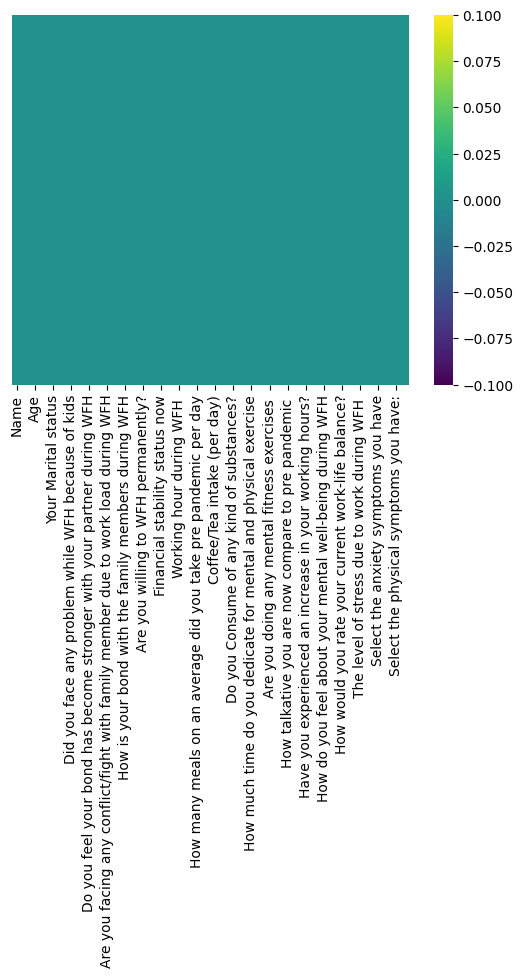

In [ ]:
sns.heatmap(data.isnull(),yticklabels = False,cmap = 'viridis')

<ipython-input-62-8adbd7455832>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(),annot = True,cmap = 'viridis')


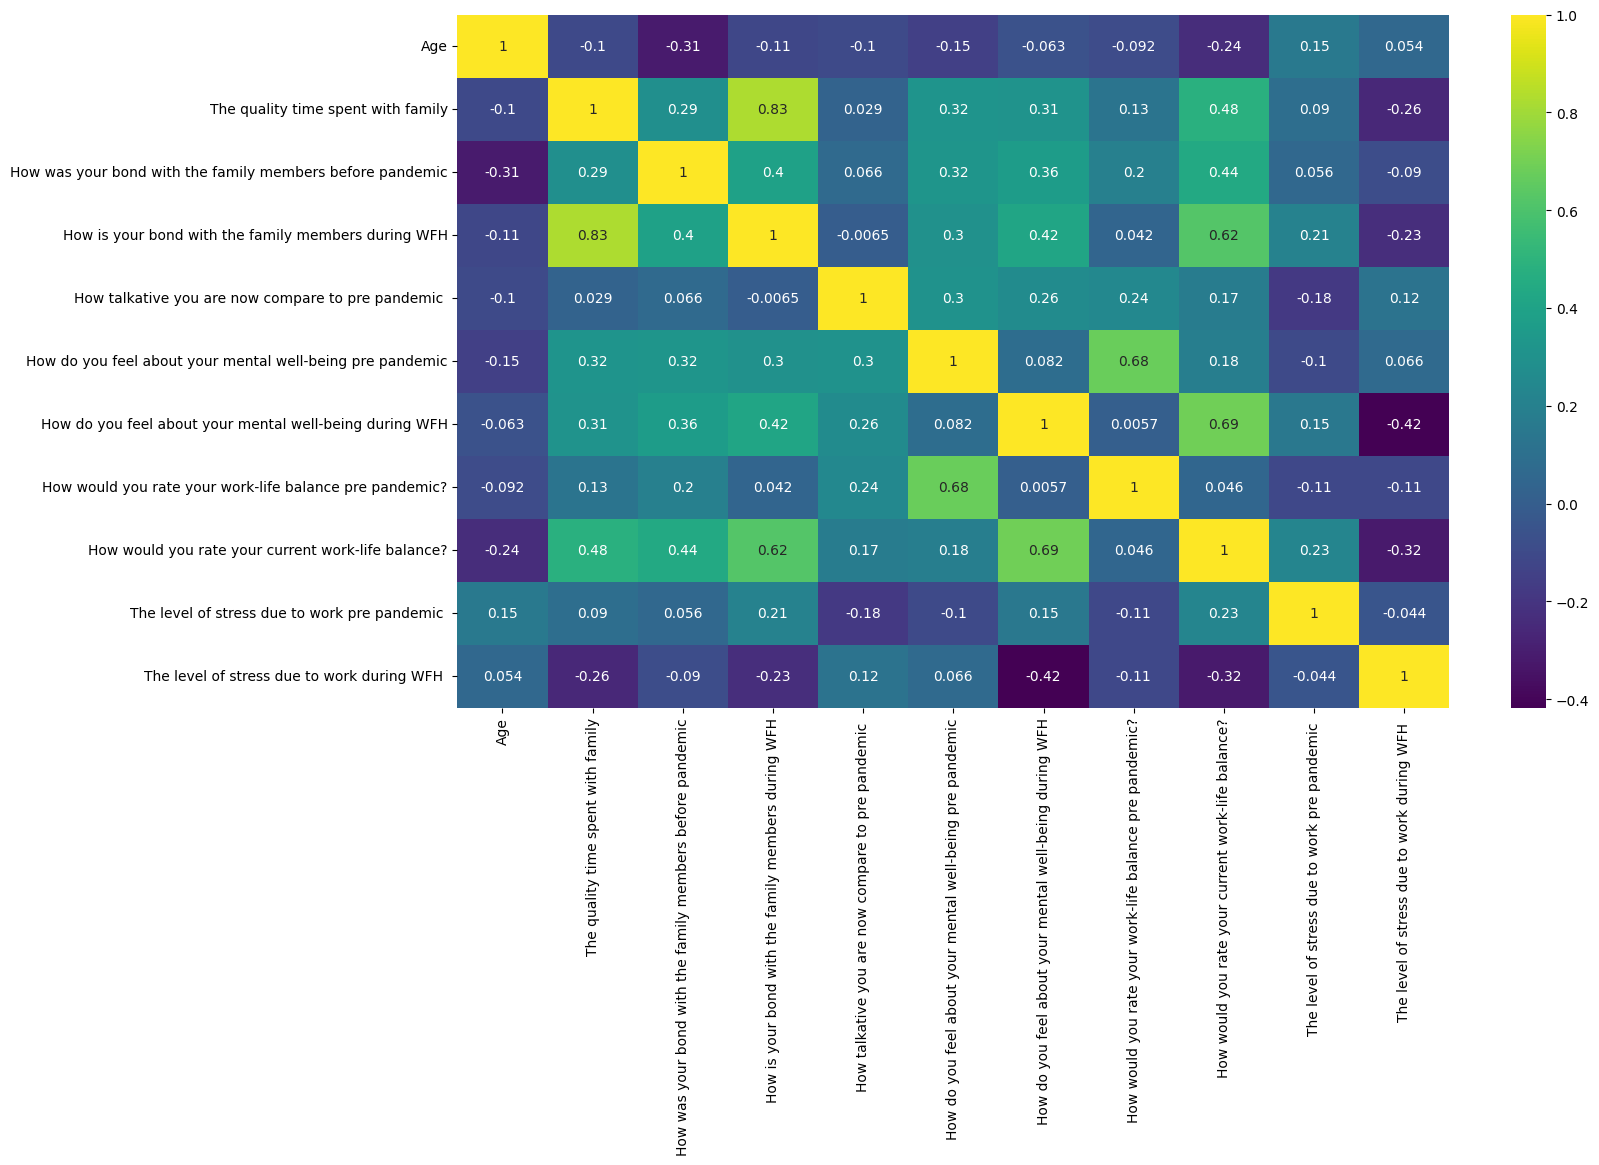

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(data.corr(),annot = True,cmap = 'viridis')
plt.show()

In [ ]:
Gender=pd.get_dummies(data['Gender'],drop_first=True)
Gender.head(5)

,Male
2,1
3,0
4,0
5,1
6,0


In [ ]:
Marital=pd.get_dummies(data['Your Marital status'],drop_first=True)
Marital.head(5)

,Single
2,0
3,1
4,0
5,0
6,1


In [ ]:
Education = pd.get_dummies(data['Your highest educational qualification'],drop_first=True)
Education.head(4)

,Intermediate,Masters/Post Graduation
2,0,1
3,0,1
4,0,0
5,0,0


In [ ]:
data.head()

,Name,Gender,Age,Your highest educational qualification,Your Marital status,Do you have kids,Did you face any problem while WFH because of kids,Compare to pre pandemic do you now get more time to spend with your family,Do you feel your bond has become stronger with your partner during WFH,The quality time spent with family,...,How do you feel about your mental well-being during WFH,How would you rate your work-life balance pre pandemic?,How would you rate your current work-life balance?,The level of stress due to work pre pandemic,The level of stress due to work during WFH,Have you been stressed out about deadlines during the WFH scenario.,Select the anxiety symptoms you have,Select the Psychological symptoms you have:,Select the physical symptoms you have:,Have you ever taken treatment for stress-related issues
2,Alagar,Male,32,Masters/Post Graduation,Married,Yes,No,No,Yes,4,...,3,4,2,3,5,Yes,No,I don't have any of these symptoms,I don't have any of these symptoms,No
3,Neha,Female,24,Masters/Post Graduation,Single,No,No,Yes,Yes,4,...,3,3,3,3,4,Yes,Feeling nervous;Sweating,I don't have any of these symptoms,Headaches,No
4,priyanka kumari,Female,27,Graduation,Married,No,No,Yes,Yes,4,...,5,3,4,5,2,No,na,I don't have any of these symptoms,I don't have any of these symptoms,No
5,Pankaj Kumar,Male,29,Graduation,Married,No,No,Yes,Yes,4,...,3,3,3,3,3,No,Sweating,Irritability,"Gastrointestinal upsets, such as diarrhoea or ...",No
6,Anagha Rajan,Female,27,Masters/Post Graduation,Single,No,No,Yes,Yes,4,...,2,3,4,2,3,No,Breathing rapidly,Anxiety,"Fatigue;Gastrointestinal upsets, such as diarr...",No


In [ ]:
treatment = pd.get_dummies(data['Have you ever taken treatment for stress-related issues'],drop_first=True)
treatment.head(4)

,Yes
2,0
3,0
4,0
5,0


In [ ]:
stress = pd.get_dummies(data['Have you been stressed out about deadlines during the WFH scenario.'],drop_first=True)
stress.head(4)

,Yes
2,1
3,1
4,0
5,0


In [ ]:
kids = pd.get_dummies(data['Do you have kids'],drop_first=True)
kids.head(4)

,Yes
2,1
3,0
4,0
5,0


In [ ]:
pkids = pd.get_dummies(data['Did you face any problem while WFH because of kids'],drop_first=True)
pkids.head(4)

,Yes
2,0
3,0
4,0
5,0


In [ ]:
family_time = pd.get_dummies(data['Compare to pre pandemic do you now get more time to spend with your family'],drop_first=True)
family_time.head(4)

,Yes
2,0
3,1
4,1
5,1


In [ ]:
family_conf = pd.get_dummies(data['Are you facing any conflict/fight with family member due to work load during WFH'],drop_first=True)
family_conf.head(4)

,Yes
2,1
3,1
4,1
5,1


In [ ]:
c_WFH = pd.get_dummies(data['Currently are you working from home(WFH) ?'],drop_first=True)
c_WFH.head(4)

,Yes
2,0
3,0
4,1
5,0


In [ ]:
p_WFH = pd.get_dummies(data['Are you willing to WFH permanently?'],drop_first=True)
p_WFH.head(4)

,Yes
2,1
3,1
4,1
5,1


In [ ]:
job_loss = pd.get_dummies(data['Did you lost your job or have faced deduction in salary during Covid -19'],drop_first=True)
job_loss.head(4)

,Yes
2,0
3,0
4,0
5,1


In [ ]:
whrs_inc = pd.get_dummies(data['Have you experienced an increase in your working hours?'],drop_first=True)
whrs_inc.head(4)

,Yes
2,1
3,0
4,0
5,1


In [ ]:
data = pd.concat([data,Gender,Marital,Education,treatment,stress,kids,pkids,family_time,family_conf,c_WFH,p_WFH,job_loss,whrs_inc],axis=1)

In [ ]:
data.head(5)

,Name,Gender,Age,Your highest educational qualification,Your Marital status,Do you have kids,Did you face any problem while WFH because of kids,Compare to pre pandemic do you now get more time to spend with your family,Do you feel your bond has become stronger with your partner during WFH,The quality time spent with family,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,Alagar,Male,32,Masters/Post Graduation,Married,Yes,No,No,Yes,4,...,0,1,1,0,0,1,0,1,0,1
3,Neha,Female,24,Masters/Post Graduation,Single,No,No,Yes,Yes,4,...,0,1,0,0,1,1,0,1,0,0
4,priyanka kumari,Female,27,Graduation,Married,No,No,Yes,Yes,4,...,0,0,0,0,1,1,1,1,0,0
5,Pankaj Kumar,Male,29,Graduation,Married,No,No,Yes,Yes,4,...,0,0,0,0,1,1,0,1,1,1
6,Anagha Rajan,Female,27,Masters/Post Graduation,Single,No,No,Yes,Yes,4,...,0,0,0,0,1,0,1,1,0,1


In [ ]:
data.drop(['Name','Gender','Your highest educational qualification','Your Marital status','Have you been stressed out about deadlines during the WFH scenario.','Have you ever taken treatment for stress-related issues','Select the anxiety symptoms you have','Select the Psychological symptoms you have:','Select the physical symptoms you have:','Did you face any problem while WFH because of kids','Do you have kids','Compare to pre pandemic do you now get more time to spend with your family','Do you feel your bond has become stronger with your partner during WFH','The quality time spent with family','Are you facing any conflict/fight with family member due to work load during WFH','Currently are you working from home(WFH) ?','Are you willing to WFH permanently?','Did you lost your job or have faced deduction in salary during Covid -19','As social interaction has been decreased in general as compared to pre pandemic, has this change affected your work-life?','Have you experienced an increase in your working hours?'],axis=1,inplace=True)

In [ ]:
data.drop(['Financial stability status now'],axis=1,inplace=True)

In [ ]:
data.drop(['How was your bond with the family members before pandemic'],axis=1,inplace=True)

In [ ]:
data.drop(['How is your bond with the family members during WFH'],axis=1,inplace=True)

In [ ]:
data.drop(['Duration of sleep'],axis=1,inplace=True)

In [ ]:
data.drop(['How many meals on an average did you take pre pandemic per day'],axis=1,inplace=True)

In [ ]:
data.drop(['How much time do you dedicate for mental and physical exercise'],axis=1,inplace=True)

In [ ]:
data.drop(['New habits you started during WFH'],axis=1,inplace=True)

In [ ]:
data.drop(['Do you Consume of any kind of substances?'],axis=1,inplace=True)

In [ ]:
data.drop(['Age'],axis=1,inplace=True)

In [ ]:
data.drop(['Coffee/Tea intake (per day)'],axis=1,inplace=True)

In [ ]:
data.drop(['How do you feel about your mental well-being pre pandemic'],axis=1,inplace=True)

In [ ]:
data.drop(['How would you rate your work-life balance pre pandemic?'],axis=1,inplace=True)

In [ ]:
data.drop(['How would you rate your current work-life balance?'],axis=1,inplace=True)

In [ ]:
data.head()

,Working hour before pandemic,Working hour during WFH,How many meals are you taking durning WFH per day,On an average are you smoking more during WFH,Are you doing any physical fitness exercises,Are you doing any mental fitness exercises,How talkative you are now compare to pre pandemic,Your work efficiency during WFH?,How do you feel about your mental well-being during WFH,The level of stress due to work pre pandemic,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,<8 hrs,9-12 hrs,3,I don't smoke,Walking,No,3,Decrease,3,3,...,0,1,1,0,0,1,0,1,0,1
3,9-12 hrs,<8 hrs,4 or more,I don't smoke,Zumba;Walking;Yoga,Yoga,4,Increased,3,3,...,0,1,0,0,1,1,0,1,0,0
4,9-12 hrs,9-12 hrs,3,I don't smoke,Walking;exercise,intensive home excercise,3,Same as before,5,5,...,0,0,0,0,1,1,1,1,0,0
5,9-12 hrs,9-12 hrs,3,I don't smoke,Walking,Meditation,3,Increased,3,3,...,0,0,0,0,1,1,0,1,1,1
6,<8 hrs,9-12 hrs,3,I don't smoke,Gym,Breath focus,2,Increased,2,2,...,0,0,0,0,1,0,1,1,0,1


In [ ]:
data=data.drop(data.columns[[0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 2 to 97
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Male                     35 non-null     uint8
 1   Single                   35 non-null     uint8
 2   Intermediate             35 non-null     uint8
 3   Masters/Post Graduation  35 non-null     uint8
 4   Yes                      35 non-null     uint8
 5   Yes                      35 non-null     uint8
 6   Yes                      35 non-null     uint8
 7   Yes                      35 non-null     uint8
 8   Yes                      35 non-null     uint8
 9   Yes                      35 non-null     uint8
 10  Yes                      35 non-null     uint8
 11  Yes                      35 non-null     uint8
 12  Yes                      35 non-null     uint8
 13  Yes                      35 non-null     uint8
dtypes: uint8(14)
memory usage: 770.0 bytes


In [ ]:
data

,Male,Single,Intermediate,Masters/Post Graduation,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,1,0,0,1,0,1,1,0,0,1,0,1,0,1
3,0,1,0,1,0,1,0,0,1,1,0,1,0,0
4,0,0,0,0,0,0,0,0,1,1,1,1,0,0
5,1,0,0,0,0,0,0,0,1,1,0,1,1,1
6,0,1,0,1,0,0,0,0,1,0,1,1,0,1
16,0,1,0,1,0,0,0,1,1,1,1,0,0,1
18,1,1,0,0,0,0,0,0,1,0,1,1,0,0
20,0,1,0,0,0,0,0,0,1,0,1,1,1,1
22,0,1,0,1,1,1,0,1,1,1,0,0,1,1
23,0,1,0,0,0,0,0,0,1,0,1,1,0,0


In [ ]:
#X=data.drop(data.columns[[10]],axis=1)
X=data.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13]].values
y=stress

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
X

array([[1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
       [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [ ]:
y.head()

,Yes
2,1
3,1
4,0
5,0
6,0


In [ ]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.78      0.88      0.82         8\n           1       0.50      0.33      0.40         3\n\n    accuracy                           0.73        11\n   macro avg       0.64      0.60      0.61        11\nweighted avg       0.70      0.73      0.71        11\n'

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
d = confusion_matrix(y_test, predictions)

<Axes: >

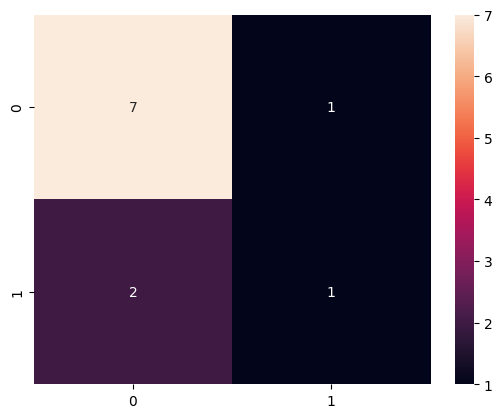

In [ ]:
sns.heatmap(d, annot=True)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logmodel, X, y, cv=5)
scores
scores.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0.5428571428571429

In [ ]:
7/8

0.875

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.50      0.33      0.40         3

    accuracy                           0.73        11
   macro avg       0.64      0.60      0.61        11
weighted avg       0.70      0.73      0.71        11



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, predictions)

0.7272727272727273

# knn

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
import math
math.sqrt(len(y_test))

3.3166247903554

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric = 'euclidean')

In [ ]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[6 2]
 [2 1]]


<Axes: >

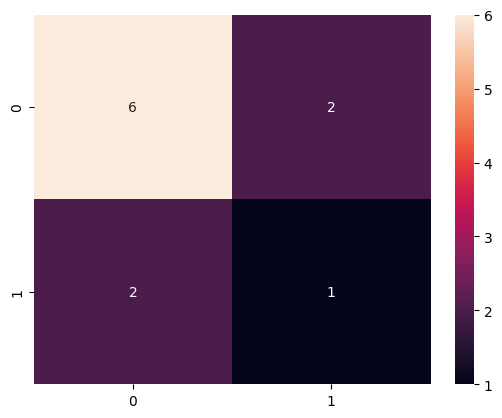

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)


In [ ]:
6/7

0.8571428571428571

In [ ]:

scores1 = cross_val_score(classifier, X, y, cv=5)
scores1
scores1.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

0.6

In [ ]:
print(f1_score(y_test, y_pred))

0.3333333333333333


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.33      0.33      0.33         3

    accuracy                           0.64        11
   macro avg       0.54      0.54      0.54        11
weighted avg       0.64      0.64      0.64        11



In [ ]:
print(accuracy_score(y_test, y_pred))

0.6363636363636364


# Decision_tree

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
y_pred_en = clf_entropy.predict(X_test)
print(y_pred_en)

[0 1 0 1 1 0 0 0 0 0 1]


In [ ]:
c = confusion_matrix(y_test, y_pred_en)

<Axes: >

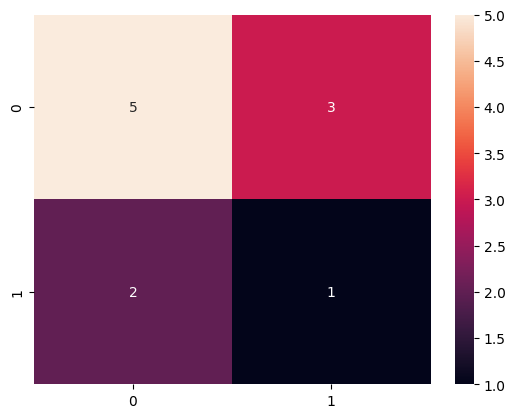

In [ ]:
import seaborn as sns
sns.heatmap(c, annot=True)



In [ ]:
5/6

0.8333333333333334

In [ ]:
print("Accuracy is ", accuracy_score(y_test,y_pred_en))

Accuracy is  0.5454545454545454


In [ ]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.25      0.33      0.29         3

    accuracy                           0.55        11
   macro avg       0.48      0.48      0.48        11
weighted avg       0.59      0.55      0.56        11



In [ ]:
scores1 = cross_val_score(clf_entropy, X, y, cv=5)
scores1
scores1.mean()

0.6285714285714287

# Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_test = sc.transfrom(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=5, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

<ipython-input-137-c3e991a7dc76>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [ ]:
classifier.score(X_test, y_test)

0.6363636363636364

In [ ]:
y_predi = classifier.predict(X_test)

<Axes: >

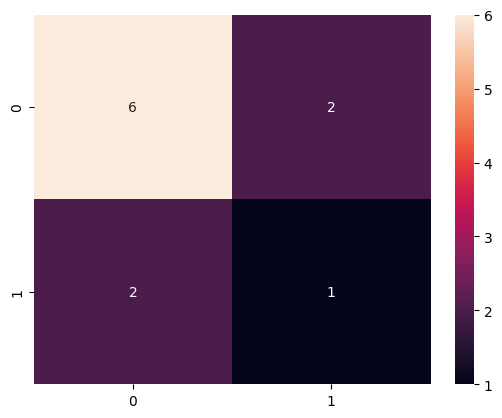

In [ ]:
con = confusion_matrix(y_test, y_predi)
sns.heatmap(con, annot=True)

In [ ]:
6/7

0.8571428571428571

In [ ]:
scores1 = cross_val_score(classifier, X, y, cv=5)
scores1
scores1.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.6857142857142857

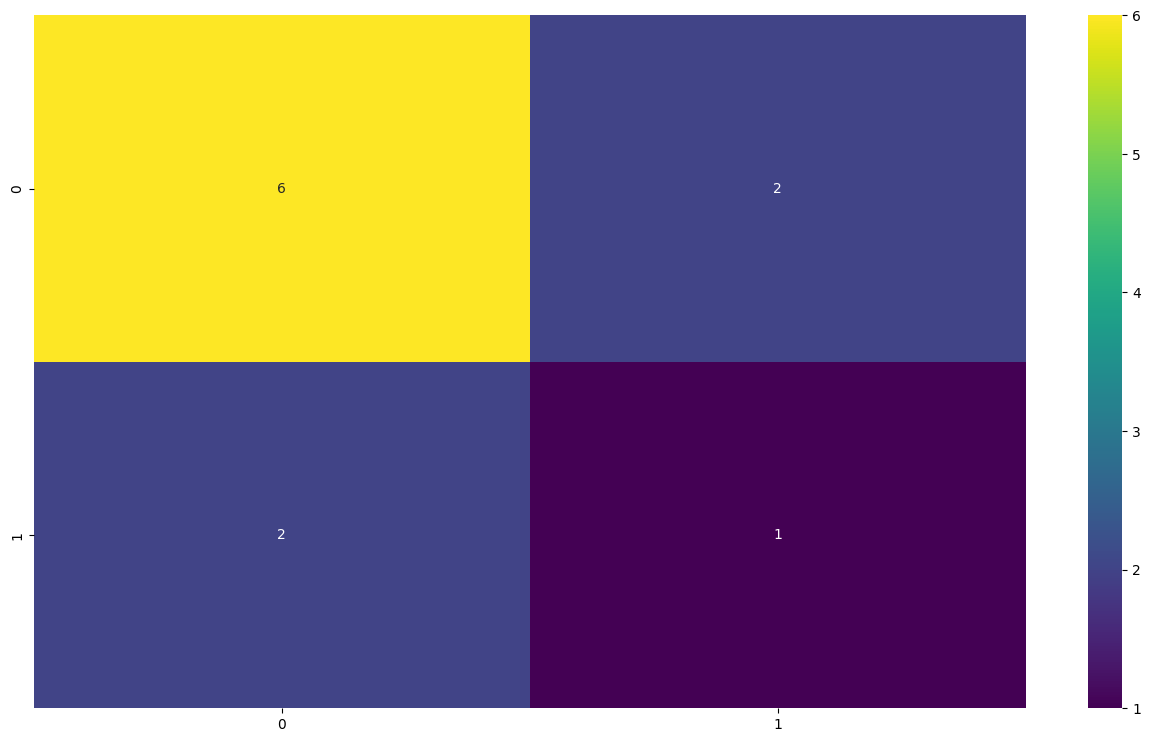

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(con, annot = True,cmap = 'viridis')
plt.show()

In [ ]:
accuracy_score(y_test, y_predi)

0.6363636363636364

In [ ]:
print(classification_report(y_test, y_predi))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.33      0.33      0.33         3

    accuracy                           0.64        11
   macro avg       0.54      0.54      0.54        11
weighted avg       0.64      0.64      0.64        11



# Bagging

In [ ]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled[:3]

array([[ 0.91766294, -2.78388218, -0.17149859,  1.30088727, -0.40824829,
         4.0620192 , -0.30618622, -2.        ,  1.69967317, -1.30088727,
         0.8660254 , -0.45485883,  0.72231512],
       [-1.08972474,  0.3592106 , -0.17149859,  1.30088727, -0.40824829,
        -0.24618298, -0.30618622,  0.5       ,  1.69967317, -1.30088727,
         0.8660254 , -0.45485883, -1.38443731],
       [-1.08972474, -2.78388218, -0.17149859, -0.76870611, -0.40824829,
        -0.24618298, -0.30618622,  0.5       ,  1.69967317,  0.76870611,
         0.8660254 , -0.45485883, -1.38443731]])

In [ ]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv = 5)
scores

array([0.85714286, 0.57142857, 0.71428571, 0.85714286, 0.71428571])

<Axes: >

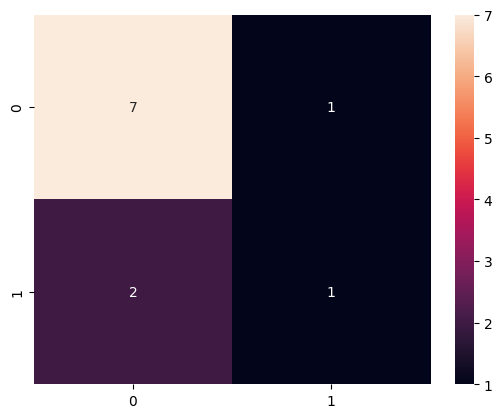

In [ ]:
cmm = confusion_matrix(y_test, predictions)
sns.heatmap(cmm, annot=True)

In [ ]:
scores.mean()

0.7428571428571429

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators = 46,
    max_samples =0.5,
    oob_score = True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.5833333333333334

In [ ]:
bag_model.score(X_test, y_test)

0.5454545454545454

In [ ]:
y_pr = bag_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.33      0.67      0.44         3

    accuracy                           0.55        11
   macro avg       0.57      0.58      0.53        11
weighted avg       0.67      0.55      0.57        11



In [ ]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators = 46,
    max_samples =0.5,
    oob_score = True,
    random_state=0
)
scores = cross_val_score(bag_model, X, y, cv=5)
scores.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarnin

0.5142857142857142

In [ ]:
scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)
scores.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.6571428571428573

# Boosting

In [ ]:
nmodel = DecisionTreeClassifier(criterion='entropy', max_depth = 5)
AdaBoost = AdaBoostClassifier(base_estimator = nmodel, n_estimators=100, learning_rate=1)
boostmodel = AdaBoost.fit(X_train, y_train)

y_pr = boostmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
prediction = metrics.accuracy_score(y_test, y_pr)
prediction

0.45454545454545453

<Axes: >

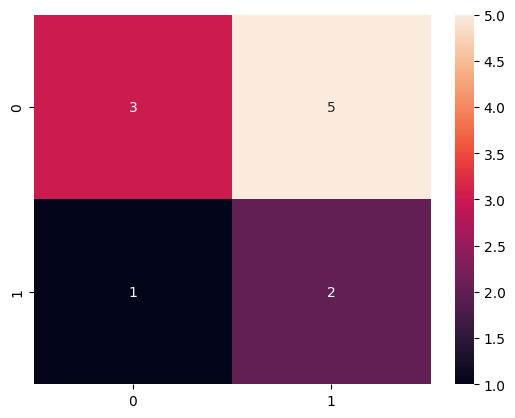

In [ ]:
cf = confusion_matrix(y_test, y_pr)
sns.heatmap(cf, annot=True)

In [ ]:
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.29      0.67      0.40         3

    accuracy                           0.45        11
   macro avg       0.52      0.52      0.45        11
weighted avg       0.62      0.45      0.47        11



In [ ]:
scores1 = cross_val_score(boostmodel, X, y, cv=5)
scores1
scores1.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarnin

0.6857142857142857